In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

/home/amirhossein/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [4]:
print(pywt.families(short=True))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [5]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'morl', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

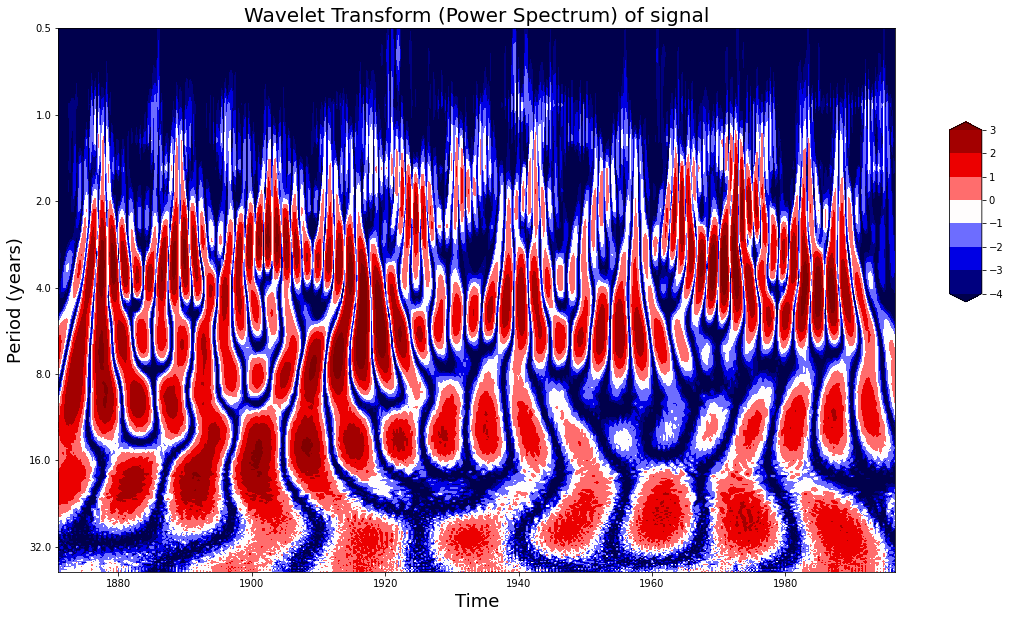

In [6]:
dataset = "./sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

scales = np.arange(1, 128)
plot_wavelet(time, signal, scales)

In [7]:
time

array([1871.  , 1871.25, 1871.5 , 1871.75, 1872.  , 1872.25, 1872.5 ,
       1872.75, 1873.  , 1873.25, 1873.5 , 1873.75, 1874.  , 1874.25,
       1874.5 , 1874.75, 1875.  , 1875.25, 1875.5 , 1875.75, 1876.  ,
       1876.25, 1876.5 , 1876.75, 1877.  , 1877.25, 1877.5 , 1877.75,
       1878.  , 1878.25, 1878.5 , 1878.75, 1879.  , 1879.25, 1879.5 ,
       1879.75, 1880.  , 1880.25, 1880.5 , 1880.75, 1881.  , 1881.25,
       1881.5 , 1881.75, 1882.  , 1882.25, 1882.5 , 1882.75, 1883.  ,
       1883.25, 1883.5 , 1883.75, 1884.  , 1884.25, 1884.5 , 1884.75,
       1885.  , 1885.25, 1885.5 , 1885.75, 1886.  , 1886.25, 1886.5 ,
       1886.75, 1887.  , 1887.25, 1887.5 , 1887.75, 1888.  , 1888.25,
       1888.5 , 1888.75, 1889.  , 1889.25, 1889.5 , 1889.75, 1890.  ,
       1890.25, 1890.5 , 1890.75, 1891.  , 1891.25, 1891.5 , 1891.75,
       1892.  , 1892.25, 1892.5 , 1892.75, 1893.  , 1893.25, 1893.5 ,
       1893.75, 1894.  , 1894.25, 1894.5 , 1894.75, 1895.  , 1895.25,
       1895.5 , 1895

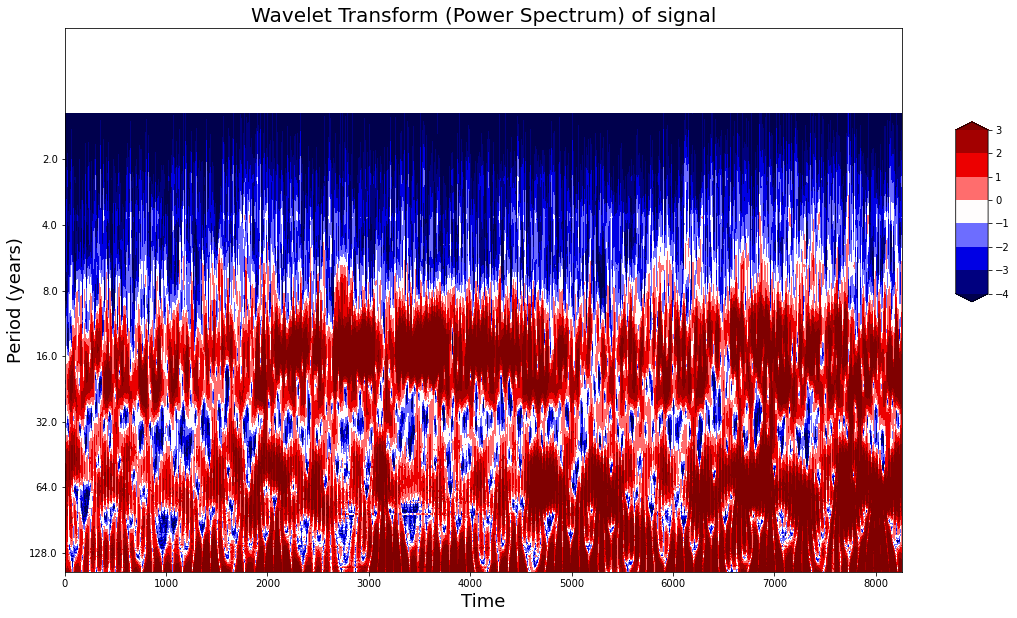

In [23]:
dataset = "./test.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
fs = 825.8
dt=1
time = np.arange(0, N) * dt
signal = df_nino.values.squeeze()
signal = 1000 * signal

scales = np.arange(1, 128)
plot_wavelet(time, signal, scales)

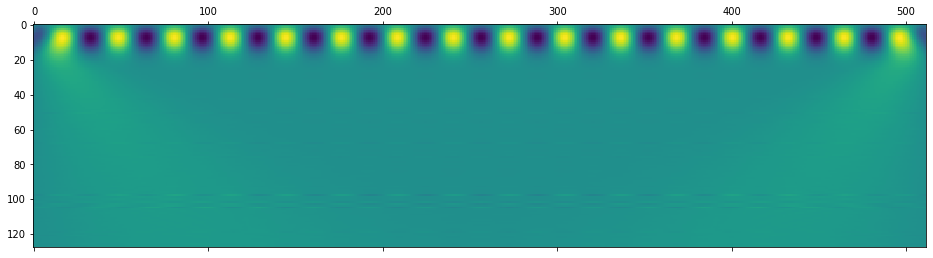

In [17]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef)
plt.show()

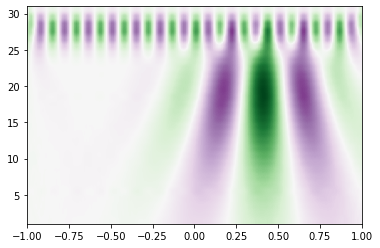

In [18]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()